<a href="https://colab.research.google.com/github/Srinivas-Bhamidipati/My_DataScience_Portfolio/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded= files.upload()
df=pd.read_csv("loan_dataset.csv")
df.head()

Saving loan_dataset.csv to loan_dataset.csv


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode())

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,0


In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


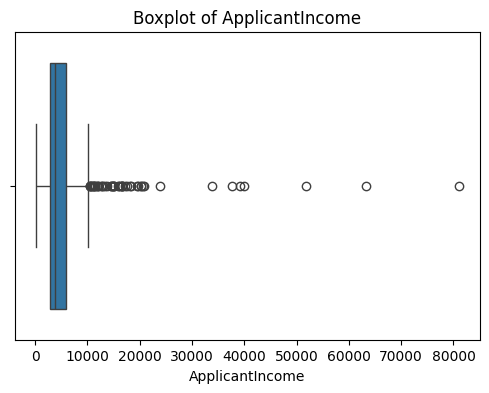

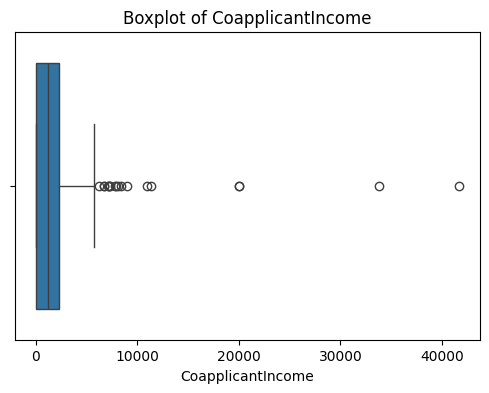

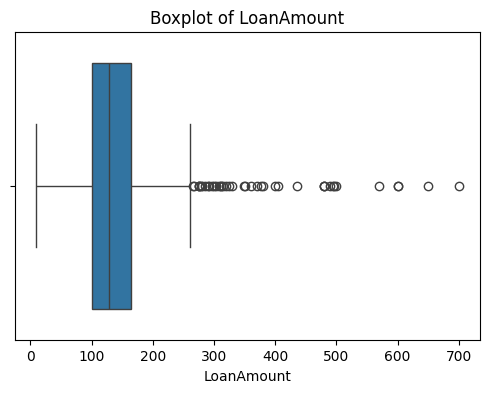

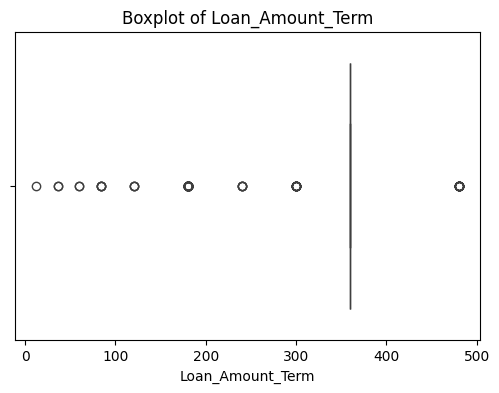

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
import numpy as np

# Creating new log-transformed columns
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])

# Quick check
df[['ApplicantIncome', 'ApplicantIncome_log',
    'CoapplicantIncome', 'CoapplicantIncome_log',
    'LoanAmount', 'LoanAmount_log']].head()


,ApplicantIncome,ApplicantIncome_log,CoapplicantIncome,CoapplicantIncome_log,LoanAmount,LoanAmount_log
0,5849,8.674197,0.0,0.000000,128.0,4.859812
1,4583,8.430327,1508.0,7.319202,128.0,4.859812
2,3000,8.006701,0.0,0.000000,66.0,4.204693
3,2583,7.857094,2358.0,7.765993,120.0,4.795791
4,6000,8.699681,0.0,0.000000,141.0,4.955827


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log'],
      dtype='object')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,8.674197,0.000000,4.859812
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,8.430327,7.319202,4.859812
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,8.006701,0.000000,4.204693
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,7.857094,7.765993,4.795791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,8.699681,0.000000,4.955827


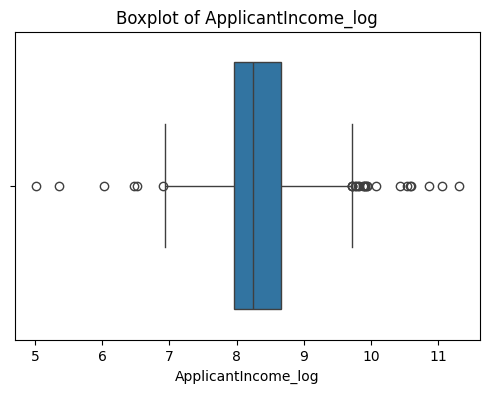

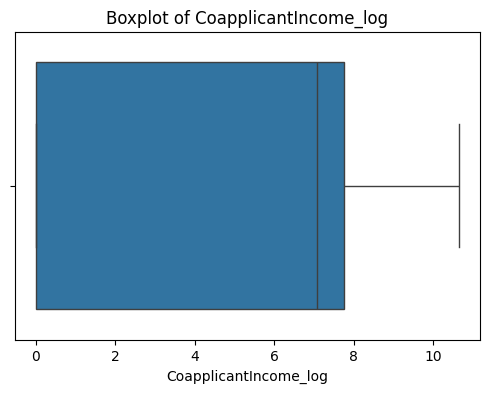

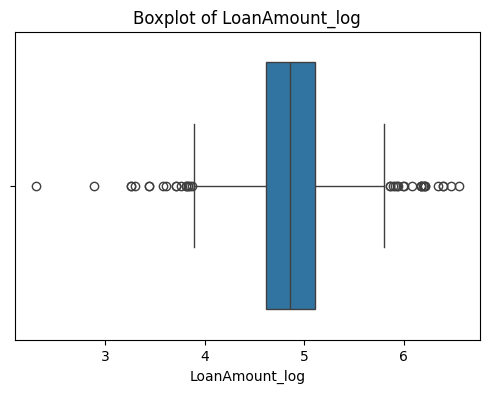

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_log']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Q1, Q3 and IQR
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Apply clipping
df['LoanAmount_clipped'] = df['LoanAmount'].clip(lower=lower_limit, upper=upper_limit)

# Quick check: show first 5 rows of original and clipped columns
df[['LoanAmount', 'LoanAmount_clipped']].head()

,LoanAmount,LoanAmount_clipped
0,128.0,128.0
1,128.0,128.0
2,66.0,66.0
3,120.0,120.0
4,141.0,141.0


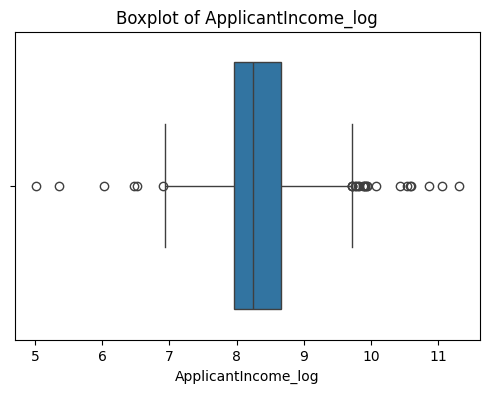

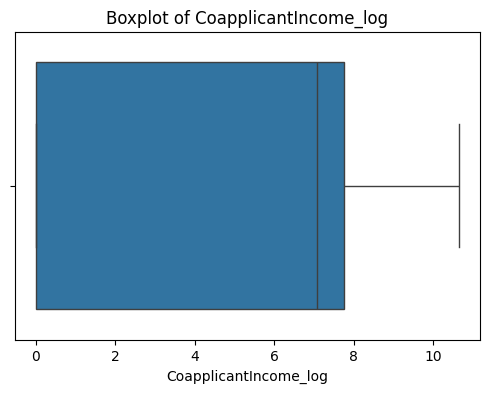

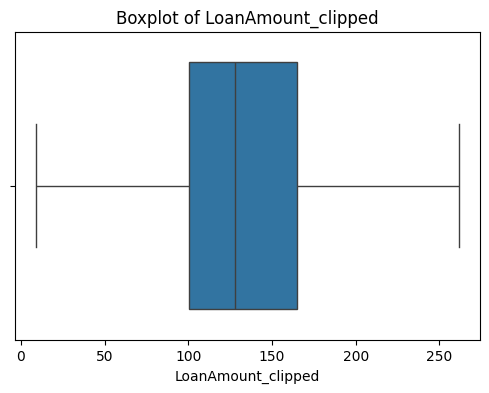

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['ApplicantIncome_log', 'CoapplicantIncome_log', 'LoanAmount_clipped']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Q1, Q3 and IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q3 = df['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Apply clipping
df['ApplicantIncome_clipped'] = df['ApplicantIncome'].clip(lower=lower_limit, upper=upper_limit)

# Quick check: show first 5 rows of original and clipped columns
df[['ApplicantIncome', 'ApplicantIncome_clipped']].head()

,ApplicantIncome,ApplicantIncome_clipped
0,5849,5849.0
1,4583,4583.0
2,3000,3000.0
3,2583,2583.0
4,6000,6000.0


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


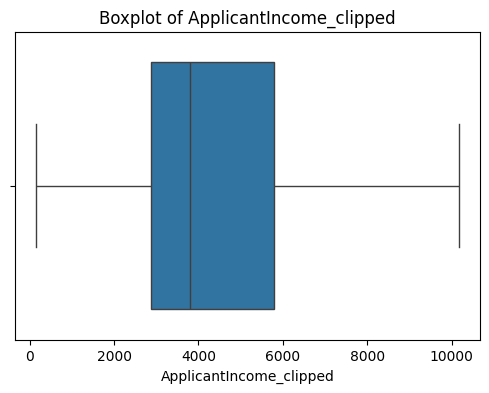

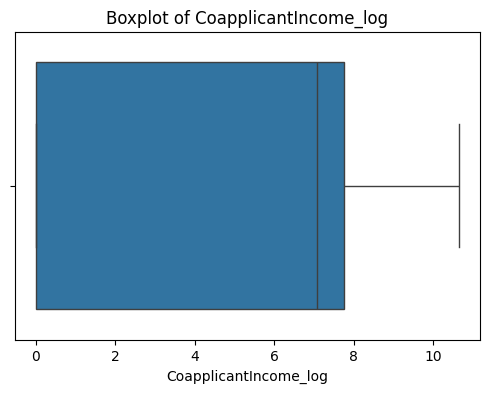

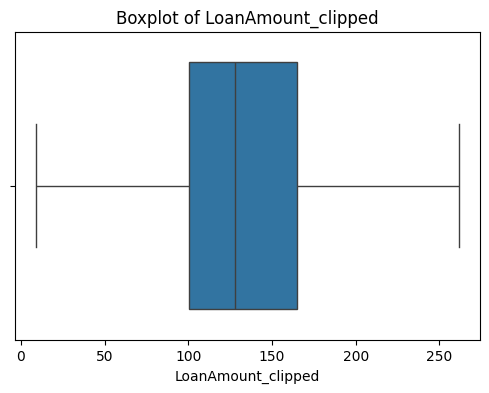

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['ApplicantIncome_clipped', 'CoapplicantIncome_log', 'LoanAmount_clipped']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
df.head()

,Loan_ID,Gender,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,LoanAmount_clipped,ApplicantIncome_clipped,Education_Not Graduate,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_history
0,LP001002,Male,0,No,5849,0.0,128.0,360.0,1.0,Y,8.674197,0.000000,4.859812,128.0,5849.0,False,False,False,True,1.0
1,LP001003,Male,1,No,4583,1508.0,128.0,360.0,1.0,N,8.430327,7.319202,4.859812,128.0,4583.0,False,True,False,False,1.0
2,LP001005,Male,0,Yes,3000,0.0,66.0,360.0,1.0,Y,8.006701,0.000000,4.204693,66.0,3000.0,False,True,False,True,1.0
3,LP001006,Male,0,No,2583,2358.0,120.0,360.0,1.0,Y,7.857094,7.765993,4.795791,120.0,2583.0,True,True,False,True,1.0
4,LP001008,Male,0,No,6000,0.0,141.0,360.0,1.0,Y,8.699681,0.000000,4.955827,141.0,6000.0,False,False,False,True,1.0


In [ ]:
cat_cols=df.select_dtypes(include='object').columns.tolist()
cat_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your dataset and 'Loan_Status' is the target
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Loan_Status')  # Remove target from the list

# Store results
chi2_results = []

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Loan_Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({'Column': col, 'p_value': p})

    # Optional: Visual check

chi2_df = pd.DataFrame(chi2_results)
print(chi2_df.sort_values('p_value'))

          Column   p_value
6  Property_Area  0.002136
2        Married  0.034394
4      Education  0.043100
3     Dependents  0.367851
0        Loan_ID  0.481024
1         Gender  0.708653
5  Self_Employed  1.000000


In [ ]:
print(type(categorical_cols))

<class 'list'>


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
mi=mutual_info_classif(X,y,discrete_features=True)

In [ ]:
import pandas as pd

# Columns selected for One-Hot Encoding
cat_cols = ['Education', 'Married', 'Property_Area']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df.head())

    Loan_ID Gender Dependents Self_Employed  ApplicantIncome  \
0  LP001002   Male          0            No             5849   
1  LP001003   Male          1            No             4583   
2  LP001005   Male          0           Yes             3000   
3  LP001006   Male          0            No             2583   
4  LP001008   Male          0            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Loan_Status  ApplicantIncome_log  CoapplicantIncome_log  LoanAmount_log  \
0           Y             8.674197               0.000000        4.859812   
1           N             8.430327      

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Dependents', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'ApplicantIncome_log', 'CoapplicantIncome_log',
       'LoanAmount_log', 'LoanAmount_clipped', 'ApplicantIncome_clipped',
       'Education_Not Graduate', 'Married_Yes', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
df.head()

,Loan_ID,Gender,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,ApplicantIncome_log,CoapplicantIncome_log,LoanAmount_log,LoanAmount_clipped,ApplicantIncome_clipped,Education_Not Graduate,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_history
0,LP001002,Male,0,No,5849,0.0,128.0,360.0,1.0,Y,8.674197,0.000000,4.859812,128.0,5849.0,False,False,False,True,1.0
1,LP001003,Male,1,No,4583,1508.0,128.0,360.0,1.0,N,8.430327,7.319202,4.859812,128.0,4583.0,False,True,False,False,1.0
2,LP001005,Male,0,Yes,3000,0.0,66.0,360.0,1.0,Y,8.006701,0.000000,4.204693,66.0,3000.0,False,True,False,True,1.0
3,LP001006,Male,0,No,2583,2358.0,120.0,360.0,1.0,Y,7.857094,7.765993,4.795791,120.0,2583.0,True,True,False,True,1.0
4,LP001008,Male,0,No,6000,0.0,141.0,360.0,1.0,Y,8.699681,0.000000,4.955827,141.0,6000.0,False,False,False,True,1.0


In [ ]:
X=df.drop(columns=['Loan_ID','Gender','Dependents','Self_Employed','ApplicantIncome',
                   'CoapplicantIncome','LoanAmount','Loan_Status','ApplicantIncome_log','LoanAmount_log'])
y=df['Loan_Status']

In [ ]:
X.isnull().sum()

,0
Loan_Amount_Term,0
Credit_History,0
CoapplicantIncome_log,0
LoanAmount_clipped,0
ApplicantIncome_clipped,0
Education_Not Graduate,0
Married_Yes,0
Property_Area_Semiurban,0
Property_Area_Urban,0


In [ ]:
X.head()

,Loan_Amount_Term,Credit_History,CoapplicantIncome_log,LoanAmount_clipped,ApplicantIncome_clipped,Education_Not Graduate,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
0,360.0,1.0,0.000000,128.0,5849.0,False,False,False,True
1,360.0,1.0,7.319202,128.0,4583.0,False,True,False,False
2,360.0,1.0,0.000000,66.0,3000.0,False,True,False,True
3,360.0,1.0,7.765993,120.0,2583.0,True,True,False,True
4,360.0,1.0,0.000000,141.0,6000.0,False,False,False,True


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_features=['ApplicantIncome_clipped','CoapplicantIncome_log','Loan_Amount_Term','Credit_History','LoanAmount_clipped']

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train[numeric_features])
X_test_scaled=scaler.transform(X_test[numeric_features])

In [ ]:
X_train.head()

,Loan_Amount_Term,Credit_History,CoapplicantIncome_log,LoanAmount_clipped,ApplicantIncome_clipped,Education_Not Graduate,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
83,360.0,1.0,7.719130,261.5,6000.0,False,True,True,False
90,360.0,1.0,7.972811,131.0,2958.0,False,True,True,False
227,360.0,1.0,7.436028,210.0,6250.0,False,True,True,False
482,360.0,1.0,8.055475,128.0,2083.0,False,True,True,False
464,360.0,0.0,0.000000,98.0,4166.0,False,False,True,False


In [ ]:
print(X_train.columns)
print(numeric_features)

Index(['Loan_Amount_Term', 'Credit_History', 'CoapplicantIncome_log',
       'LoanAmount_clipped', 'ApplicantIncome_clipped',
       'Education_Not Graduate', 'Married_Yes', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
['ApplicantIncome_clipped', 'CoapplicantIncome_log', 'Loan_Amount_Term', 'Credit_History', 'LoanAmount_clipped']


In [ ]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print(X_train_scaled.head())

     Loan_Amount_Term  Credit_History  CoapplicantIncome_log  \
83           0.287611        0.407763               0.890331   
90           0.287611        0.407763               0.955569   
227          0.287611        0.407763               0.817527   
482          0.287611        0.407763               0.976827   
464          0.287611       -2.452404              -1.094751   

     LoanAmount_clipped  ApplicantIncome_clipped  Education_Not Graduate  \
83             2.165426                 0.500698                   False   
90            -0.139748                -0.697895                   False   
227            1.255721                 0.599202                   False   
482           -0.192741                -1.042658                   False   
464           -0.722666                -0.221925                   False   

     Married_Yes  Property_Area_Semiurban  Property_Area_Urban  
83          True                     True                False  
90          True            

In [ ]:
X_train_scaled.head()

,Loan_Amount_Term,Credit_History,CoapplicantIncome_log,LoanAmount_clipped,ApplicantIncome_clipped,Education_Not Graduate,Married_Yes,Property_Area_Semiurban,Property_Area_Urban
83,0.287611,0.407763,0.890331,2.165426,0.500698,False,True,True,False
90,0.287611,0.407763,0.955569,-0.139748,-0.697895,False,True,True,False
227,0.287611,0.407763,0.817527,1.255721,0.599202,False,True,True,False
482,0.287611,0.407763,0.976827,-0.192741,-1.042658,False,True,True,False
464,0.287611,-2.452404,-1.094751,-0.722666,-0.221925,False,False,True,False


In [ ]:
X_train_scaled.isnull().sum()

,0
Loan_Amount_Term,0
Credit_History,0
CoapplicantIncome_log,0
LoanAmount_clipped,0
ApplicantIncome_clipped,0
Education_Not Graduate,0
Married_Yes,0
Property_Area_Semiurban,0
Property_Area_Urban,0


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
classification_report=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_report)

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize model with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=42)

# Train
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",confusion_matrix)
classification_report=classification_report(y_test,y_pred)
print("Classification Report:\n",classification_report)

Accuracy: 0.7154471544715447
Confusion Matrix:
 [[20 23]
 [12 68]]
Classification Report:
               precision    recall  f1-score   support

           N       0.62      0.47      0.53        43
           Y       0.75      0.85      0.80        80

    accuracy                           0.72       123
   macro avg       0.69      0.66      0.66       123
weighted avg       0.70      0.72      0.70       123

